In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf

%matplotlib inline

In [2]:
random.seed(1)

### Data Preprocessing

In [3]:
train_set = pd.read_csv('dataset/sign_mnist_train.csv')
test_set = pd.read_csv('dataset/sign_mnist_test.csv')

In [4]:
X_train = train_set.iloc[:, 1:].values
y_train = train_set.iloc[:, 0].values

X_test = test_set.iloc[:, 1:].values
y_test = test_set.iloc[:, 0].values

In [5]:
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 26)
y_test = tf.keras.utils.to_categorical(y_test, 26)

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [8]:
print('total training examples:', X_train.shape[0])
print('total validation examples:', X_test.shape[0])

total training examples: 27455
total validation examples: 7172


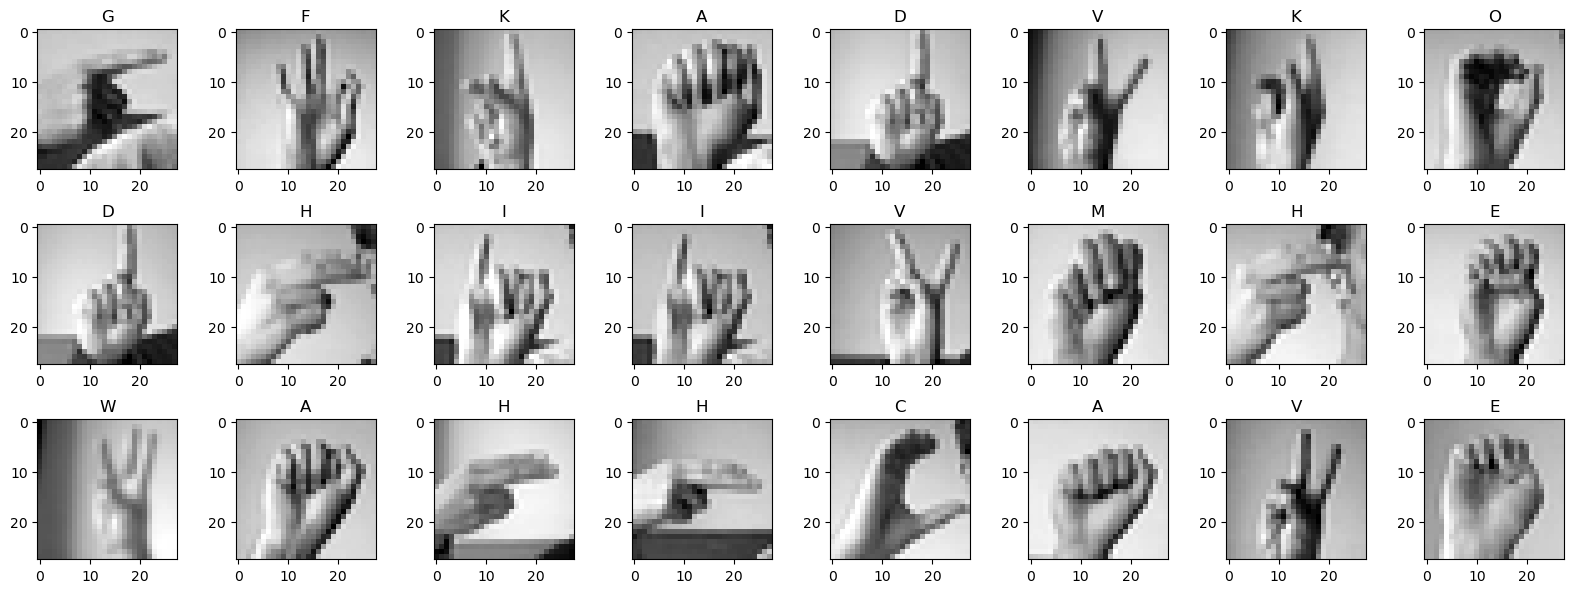

In [9]:
# Plotting our data
fig, axes = plt.subplots(3, 8, figsize=(16, 6))

for i in range(24):
    ax = axes[i//8, i%8]
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(chr(list(y_test[i]).index(max(y_test[i])) + 65))

plt.tight_layout()
plt.show()

In [10]:
# Normalizing the data
X_train  = X_train / 255.0
X_test = X_test / 255.0

### Model Training

In [11]:
# Initializing model and adding layers

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28x28 with 1 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Dropping out 50% of the neurons
    tf.keras.layers.Dropout(0.5),
    # 26 output neurons. It will contain probabilities for each of the 26 classes.
    tf.keras.layers.Dense(26, activation='softmax')
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [14]:
%%time
from livelossplot.tf_keras import PlotLossesCallback

checkpoint = tf.keras.callbacks.ModelCheckpoint("model_weights.h5", 
                                                save_weights_only=True, 
                                                monitor='val_accuracy',
                                                mode='max', 
                                                save_best_only=True)
callbacks = [checkpoint]

history = model.fit(
    X_train,
    y_train,
    epochs = 12,
    batch_size = 32,
    steps_per_epoch = X_train.shape[0] // 32,
    callbacks = callbacks,
    validation_data = (X_test, y_test),
    validation_steps = X_test.shape[0] // 32
)

Epoch 1/12
857/857 [==============================] - 21s 24ms/step - loss: 1.6362 - accuracy: 0.4856 - val_loss: 0.3280 - val_accuracy: 0.8973
Epoch 2/12
857/857 [==============================] - 25s 29ms/step - loss: 0.3372 - accuracy: 0.8819 - val_loss: 0.1509 - val_accuracy: 0.9608
Epoch 3/12
857/857 [==============================] - 25s 29ms/step - loss: 0.1734 - accuracy: 0.9419 - val_loss: 0.0945 - val_accuracy: 0.9618
Epoch 4/12
857/857 [==============================] - 25s 30ms/step - loss: 0.1184 - accuracy: 0.9598 - val_loss: 0.1692 - val_accuracy: 0.9559
Epoch 5/12
857/857 [==============================] - 25s 30ms/step - loss: 0.0854 - accuracy: 0.9722 - val_loss: 0.1113 - val_accuracy: 0.9594
Epoch 6/12
857/857 [==============================] - 26s 30ms/step - loss: 0.0653 - accuracy: 0.9778 - val_loss: 0.1064 - val_accuracy: 0.9653
Epoch 7/12
857/857 [==============================] - 25s 30ms/step - loss: 0.0637 - accuracy: 0.9783 - val_loss: 0.0736 - val_accuracy:

### Plotting Training Results

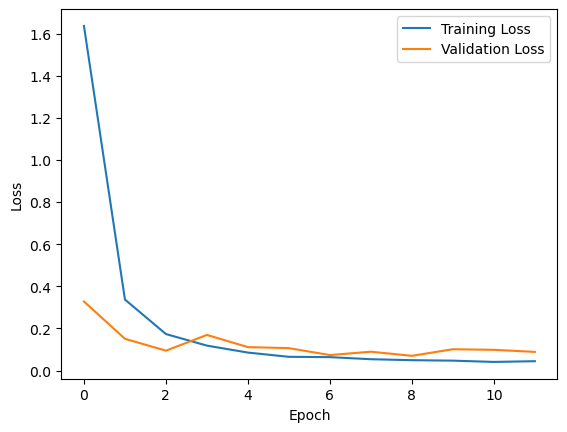

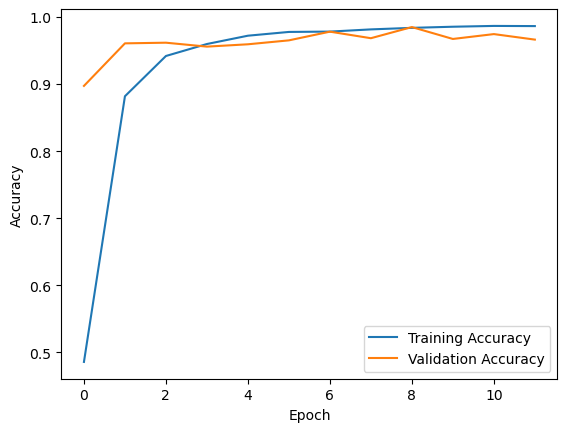

In [15]:
# plotting the training and validation loss versus number of epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting the training and validation accuracy versus number of epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Test  Set Results

In [16]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.0885588526725769
Test accuracy: 0.9663971066474915


In [17]:
y_pred = model.predict(X_test)

225/225 [==============================] - 2s 7ms/step


In [18]:
from sklearn.metrics import classification_report

report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=[i for i in "ABCDEFGHIKLMNOPQRSTUVWXY"])

print(report)

              precision    recall  f1-score   support

           A       0.94      1.00      0.97       331
           B       1.00      0.96      0.98       432
           C       0.96      1.00      0.98       310
           D       1.00      1.00      1.00       245
           E       0.94      1.00      0.97       498
           F       0.98      1.00      0.99       247
           G       0.86      0.99      0.92       348
           H       0.97      0.95      0.96       436
           I       1.00      0.92      0.96       288
           K       0.96      1.00      0.98       331
           L       0.95      1.00      0.97       209
           M       0.90      0.95      0.93       394
           N       1.00      0.93      0.96       291
           O       1.00      0.94      0.97       246
           P       0.98      1.00      0.99       347
           Q       1.00      1.00      1.00       164
           R       1.00      1.00      1.00       144
           S       1.00    

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 414   0   0   0   0   0   0   0  15   0   0   0   0   3   0   0   0
    0   0   0   0   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 498   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 344   0   0   0   0   0   0   0   4   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  20 416   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 265   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  23]
 [  0   0   0   0   0   0   0   0   0 331   0   0   0   0   0   0   0   0
    0   0   0   0

<Axes: >

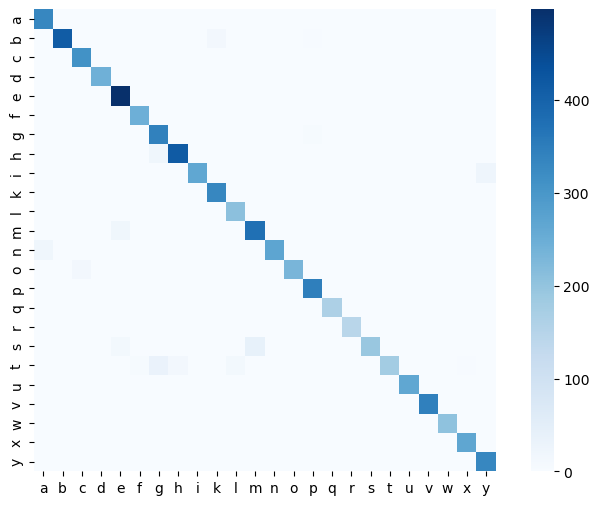

In [19]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Print the confusion matrix
print(cm)

cm_df = pd.DataFrame(cm, index=[i for i in "abcdefghiklmnopqrstuvwxy"], columns=[i for i in "abcdefghiklmnopqrstuvwxy"])
plt.figure(figsize = (9,6))
sn.heatmap(cm_df, cmap="Blues", square=True)

# Plot the confusion matrix as an image
# plt.matshow(cm2)
# plt.colorbar()
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [20]:
# Saving trained model
model.save('model.h5')

### Model Training Without Dropout

In [21]:
# Initializing model and adding layers

model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28x28 with 1 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Dropping out 50% of the neurons
    # 26 output neurons. It will contain probabilities for each of the 26 classes.
    tf.keras.layers.Dense(26, activation='softmax')
])

In [22]:
model2.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       

In [24]:
%%time
from livelossplot.tf_keras import PlotLossesCallback

checkpoint2 = tf.keras.callbacks.ModelCheckpoint("model_weights2.h5", 
                                                save_weights_only=True, 
                                                monitor='val_accuracy',
                                                mode='max', 
                                                save_best_only=True)
callbacks = [checkpoint2]

history2 = model2.fit(
    X_train,
    y_train,
    epochs = 12,
    batch_size = 32,
    steps_per_epoch = X_train.shape[0] // 32,
    callbacks = callbacks,
    validation_data = (X_test, y_test),
    validation_steps = X_test.shape[0] // 32
)

Epoch 1/12
857/857 [==============================] - 23s 26ms/step - loss: 0.6882 - accuracy: 0.7916 - val_loss: 0.2724 - val_accuracy: 0.9169
Epoch 2/12
857/857 [==============================] - 23s 27ms/step - loss: 0.0201 - accuracy: 0.9957 - val_loss: 0.1828 - val_accuracy: 0.9501
Epoch 3/12
857/857 [==============================] - 23s 27ms/step - loss: 5.1130e-04 - accuracy: 1.0000 - val_loss: 0.2097 - val_accuracy: 0.9520
Epoch 4/12
857/857 [==============================] - 23s 27ms/step - loss: 1.8723e-04 - accuracy: 1.0000 - val_loss: 0.2174 - val_accuracy: 0.9540
Epoch 5/12
857/857 [==============================] - 23s 27ms/step - loss: 1.0109e-04 - accuracy: 1.0000 - val_loss: 0.2392 - val_accuracy: 0.9471
Epoch 6/12
857/857 [==============================] - 23s 27ms/step - loss: 5.8752e-05 - accuracy: 1.0000 - val_loss: 0.2504 - val_accuracy: 0.9498
Epoch 7/12
857/857 [==============================] - 23s 27ms/step - loss: 3.3353e-05 - accuracy: 1.0000 - val_loss: 0.

### Plotting Training Results

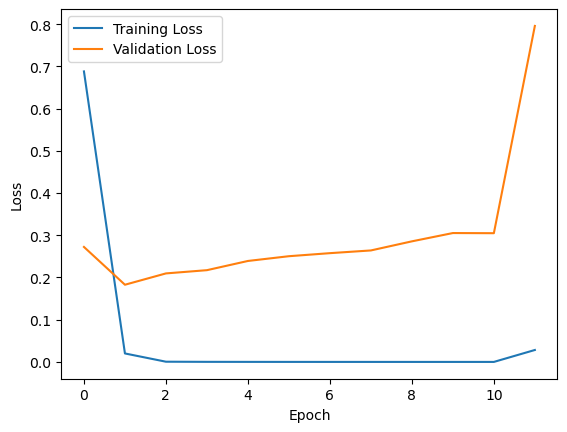

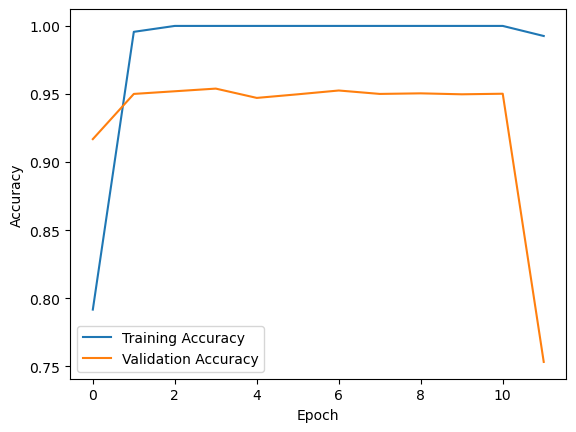

In [25]:
# plotting the training and validation loss versus number of epochs
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting the training and validation accuracy versus number of epochs
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Test  Set Results

In [26]:
score2 = model2.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score2[0]) 
print('Test accuracy:', score2[1])

Test loss: 0.7957639694213867
Test accuracy: 0.7532069087028503


In [27]:
y_pred2 = model2.predict(X_test)

225/225 [==============================] - 2s 7ms/step


In [28]:
from sklearn.metrics import classification_report

report2 = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred2, axis=1), target_names=[i for i in "ABCDEFGHIKLMNOPQRSTUVWXY"])

print(report2)

              precision    recall  f1-score   support

           A       0.85      1.00      0.92       331
           B       0.82      0.91      0.86       432
           C       0.94      0.93      0.94       310
           D       1.00      0.25      0.40       245
           E       0.96      0.78      0.86       498
           F       1.00      0.74      0.85       247
           G       0.76      0.63      0.69       348
           H       0.98      0.75      0.85       436
           I       0.93      0.90      0.91       288
           K       0.73      0.83      0.78       331
           L       0.91      1.00      0.95       209
           M       0.99      0.61      0.75       394
           N       1.00      0.66      0.80       291
           O       0.76      0.76      0.76       246
           P       0.92      0.52      0.67       347
           Q       0.76      0.99      0.86       164
           R       0.20      1.00      0.34       144
           S       0.50    

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 391   0   0   0   0   0   0   0  39   0   0   0   0   0   0   0   0
    0   0   0   2   0   0]
 [  0   0 289   0   0   0   0   7   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  14   0]
 [  0   0   0  61   0   0   0   0   0   0   0   0   0   0   0   0 151  19
    0   0   0   0  14   0]
 [  0  20   0   0 388   0   0   0   0   0   0   0   0  33   0   0   0  57
    0   0   0   0   0   0]
 [  0   4   0   0  10 184   0   0   0   0   0   0   0   0   0   0   5   0
    4   1   0   0  39   0]
 [  0   0   0   0   0   0 220   0   0   0   0   0   0   0  15   3  30   0
   25   0   0   0  53   2]
 [  0   0   0   0   0   0  68 325   0   0   0   0   0   0   0   0  17   0
    0   0   0   0   6  20]
 [  0   0   0   0   0   0   0   0 260   0   0   0   0   0   0   0   7   0
    0   0   0   0   0  21]
 [  0   0   0   0   0   0   0   0   0 275   0   0   0   0   0   0  50   0
    0   0   0   0

<Axes: >

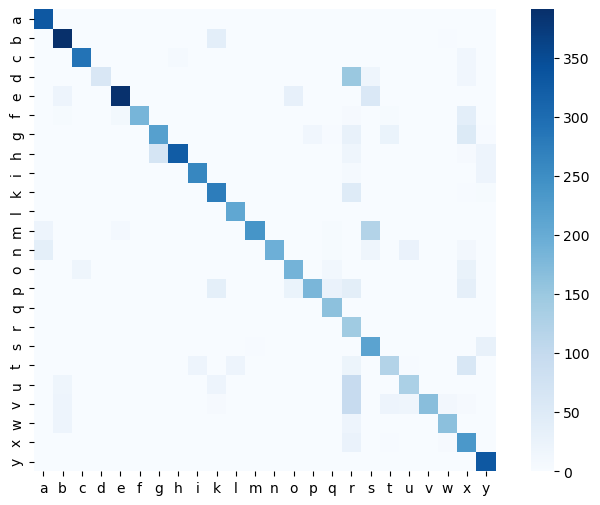

In [29]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred2, axis=1))

# Print the confusion matrix
print(cm2)

cm_df2 = pd.DataFrame(cm2, index=[i for i in "abcdefghiklmnopqrstuvwxy"], columns=[i for i in "abcdefghiklmnopqrstuvwxy"])
plt.figure(figsize = (9,6))
sn.heatmap(cm_df2, cmap="Blues", square=True)

# Plot the confusion matrix as an image
# plt.matshow(cm2)
# plt.colorbar()
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [30]:
# Saving trained model
model2.save('model2.h5')

### Comparing Results

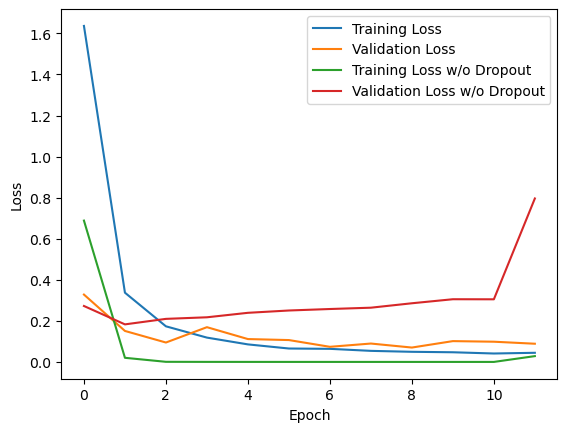

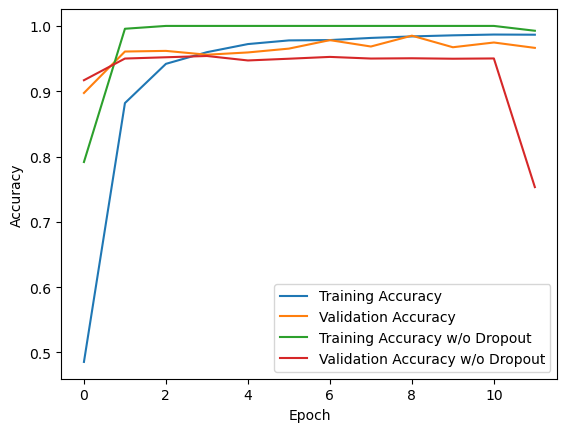

In [31]:
# plotting the training and validation loss versus number of epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['loss'], label='Training Loss w/o Dropout')
plt.plot(history2.history['val_loss'], label='Validation Loss w/o Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting the training and validation accuracy versus number of epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Training Accuracy w/o Dropout')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy w/o Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()